# Planetary Orbit Around a Star Using Newton's Laws

In this project, I will be simulating the trajectory of a planet around its star under Newtonian Gravity. I will use modules like `NumPy`, `SciPy`, and `matplotlib.pyplot` to solve the equations of motion and plot the trajectory, distance, angular momentum per unit mass, and energy per unit mass. I will use the `DOP853` method, a higher order Runge-Kutta method, for accuracy and show how it contrasts with when we do not use it. Lastly, as we will see later, I will talk a little about why this method fails to conserve energy while it perfectly conserves angular momentum.

## Equations of Motion

The equation of motion for the position vector $ \vec{r}(t) = (x(t), y(t)) $: 
$$\ddot{\vec{r}} = -\frac{GM}{|\vec{r}|^3}\vec{r}$$

where $G$ is the Universal Gravitational Constant, $M$ is the mass of the star, and $\vec{r}$ is the position vector.

The second order ODE can be further simplified as a system of first order ODEs: 
$$\dot{x} = v_x,\space \dot{y} = v_y,\space \dot{v_x} = -\frac{GM}{|\vec{r}|^3}x,\space \dot{v_y} = -\frac{GM}{|\vec{r}|^3}y$$

## Approximations and Initial Values

For convenience of calculation, I will be taking $GM \approx 4\pi^2 AU^3/yr^2$, which transforms the acceleration terms as: 
$$\dot{v}_{(x, y)} = -\frac{4\pi^2}{|\vec{r}|^3}(x, y)$$

I will define the following initial values for postion: 
$$x(0) = 1\space AU,\space y(0) = 0$$

At aphelion, the vis-viva equation simplifies to: 
$$v = \sqrt{GM\frac{(1-e)}{a(1+e)}}$$

For an $a = 1$ AU and eccentricity $e = 0.3$, the velocity at perihelion is: 
$$v \approx 0.73*2\pi$$

I will assume that the velocity is only in the y-direction at `t = 0`. So the initial values for velocity are: 
$$v_x(0) = 0,\space v_y(0) = 0.73*2\pi$$ 

### Defining a Function

In order to proceed with the calculations, I will define a function `EOM(t, y)` that takes an array of times as `t` and an array of postions and velocities as `y` and returns an array of velocities and accelerations as defined above.

In [98]:
import numpy as np

def EOM(t, y):
    x, y, vx, vy = y #y stores an array of positions and velocities
    r_mag = np.sqrt(x**2 + y**2) #magnitude of position vector
    return [vx, vy, -(4*np.pi**2)*x/r_mag**3, -(4*np.pi**2)*y/r_mag**3] #returns velocities and accelerations

### Solving the First Order ODEs

I will define an array `sol` that uses the `solve_ivp` function in `SciPy` to solve the system of ODEs and store the results. I will employ the use of the `DOP853` method, a higher order Runge-Kutta method, for integration. This method helps to keep errors to a minimum when integrating over very long periods. I will create an array `sol2` where I will not use the method. We will see the difference in the plots later. 

I will store the respective results of positions and velocities in the variables `x`, `y`, `vx` and `vy` and the distance in the variable `r_mag` for ease of coding. These results can later be used to plot the motion of the planet around its star. I will do the same for the results of `sol2` in the variables `x2`, `y2`, `vx2`, `vy2`, and `r_mag2`.

In [99]:
from scipy.integrate import solve_ivp

sol = solve_ivp(EOM, [0, 10*np.pi], [1, 0, 0, 0.73*2*np.pi], t_eval=np.linspace(0, 10*np.pi, 10000), 
                rtol=1e-9, atol=1e-12, method='DOP853') #Runge-Kutta Method for higher accuracy in long integration

sol2 = solve_ivp(EOM, [0, 10*np.pi], [1, 0, 0, 0.73*2*np.pi], 
                 t_eval=np.linspace(0, 10*np.pi, 100000)) #Standard Method

x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]
r_mag = np.sqrt(x**2 + y**2)

x2 = sol2.y[0]
y2 = sol2.y[1]
vx2 = sol2.y[2]
vy2 = sol2.y[3]
r_mag2 = np.sqrt(x2**2 + y2**2)

### Plotting

#### Trajectory and Distance

I will now use the library `matplotlib.pyplot` to plot the trajectory of the planet around its star as an $x(t)$ vs $y(t)$ graph. I will also plot the Distance vs Time graph over the same time period. I will do this with and without the Runge-Kutta method.

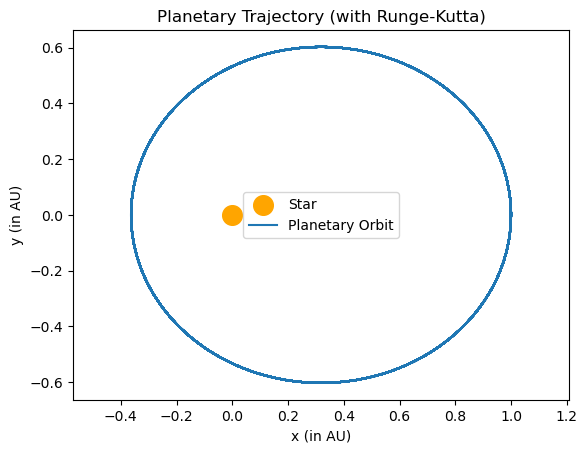

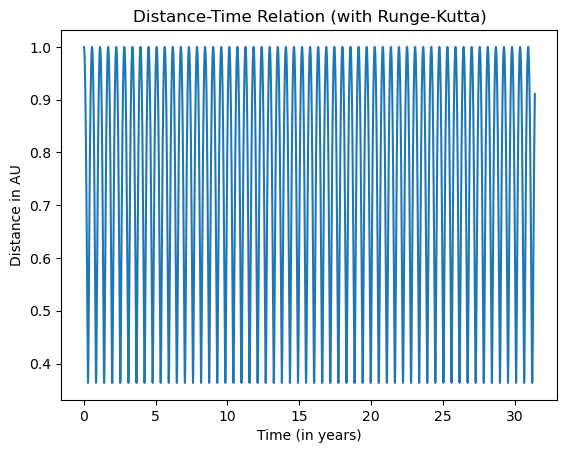

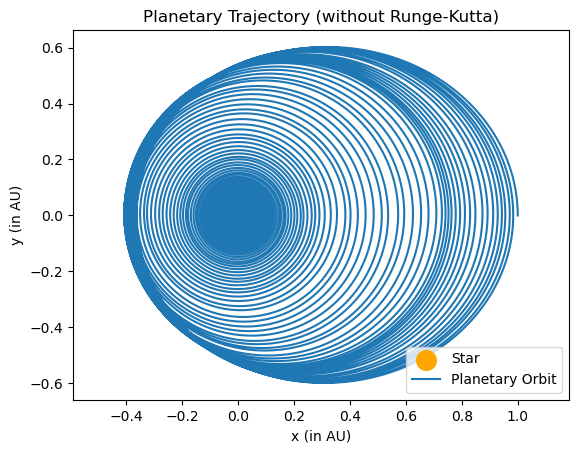

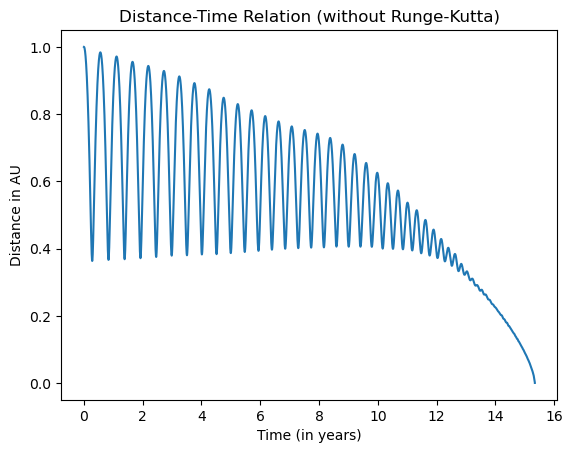

In [100]:
import matplotlib.pyplot as plt

plt.scatter(0, 0, s=200, color='orange', label='Star')
plt.plot(x, y, label='Planetary Orbit')
plt.legend()
plt.title('Planetary Trajectory (with Runge-Kutta)')
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.axis('equal')
plt.show()

plt.plot(sol.t, r_mag)
plt.title('Distance-Time Relation (with Runge-Kutta)')
plt.xlabel('Time (in years)')
plt.ylabel('Distance in AU')
plt.show()

plt.scatter(0, 0, s=200, color='orange', label='Star')
plt.plot(x2, y2, label='Planetary Orbit')
plt.legend()
plt.title('Planetary Trajectory (without Runge-Kutta)')
plt.xlabel('x (in AU)')
plt.ylabel('y (in AU)')
plt.axis('equal')
plt.show()

plt.plot(sol2.t, r_mag2)
plt.title('Distance-Time Relation (without Runge-Kutta)')
plt.xlabel('Time (in years)')
plt.ylabel('Distance in AU')
plt.show()

As is evident above, the Runge-Katta method helps preserve the stability of the orbit by minimizing errors so they don't add up to big values over long periods. The first set of plots clearly shows a stable orbit and distance-time relation, whereas the second set of plots introduces dampening due to compounding errors that display a system where the planet spirals into its star.

#### Angular Momentum per unit mass

The angular momentum formula $\vec{L} = \vec{r} \times m\vec{v}$ simplifies to: 
$$\vec{l_z} = xv_y - yv_x$$

Using this, I will plot the Angular Momentum vs Time graph and calculate the maximum deviation in angular momentum as well as the mean angular momentum.

Similar to earlier, I will compute the angular momentum with and without the Runge-Kutta method to see the difference.

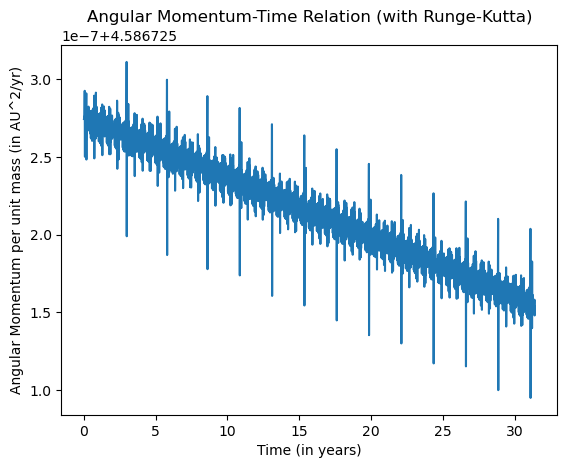

Mean angular momentum per unit mass: 4.586725214633681 AU^2/yr
Max deviation: 2.160190426536701e-07 AU^2/yr


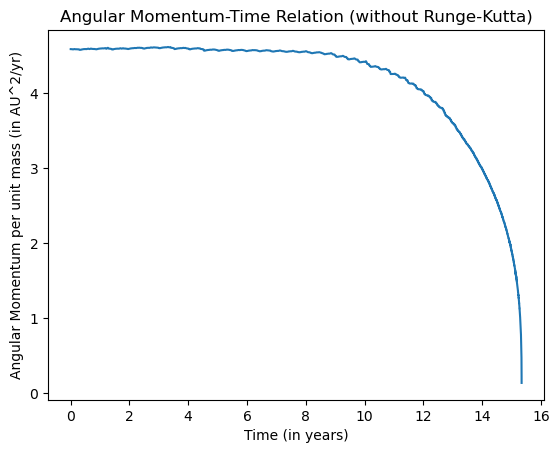

Mean angular momentum per unit mass: 4.190025116087405 AU^2/yr
Max deviation: 4.478496224687989 AU^2/yr


In [101]:
l = x*vy - y*vx
l2 = x2*vy2 - y2*vx2

plt.plot(sol.t, l)
plt.title('Angular Momentum-Time Relation (with Runge-Kutta)')
plt.xlabel('Time (in years)')
plt.ylabel('Angular Momentum per unit mass (in AU^2/yr)')
plt.show()

print('Mean angular momentum per unit mass:', np.mean(l), 'AU^2/yr')
print('Max deviation:', np.max(l) - np.min(l), 'AU^2/yr')

plt.plot(sol2.t, l2)
plt.title('Angular Momentum-Time Relation (without Runge-Kutta)')
plt.xlabel('Time (in years)')
plt.ylabel('Angular Momentum per unit mass (in AU^2/yr)')
plt.show()

print('Mean angular momentum per unit mass:', np.mean(l2), 'AU^2/yr')
print('Max deviation:', np.max(l2) - np.min(l2), 'AU^2/yr')

We can see that the angular momentum was conserved very well in the Runge-Kutta method with the highest deviation being of the order $10^{-7}$. The graph without the Runge-Katta method shows that the angular momentum starts falling off after about $10$ years and the deviation is about 20 million times more.

While the Runge-Kutta method was successful for plotting the trajectory and conserving angular momentum, we shall now see that even this method has its limitations.

#### Energy per unit mass

The energy formula $ E = T + U $ becomes: 
$$e = \frac{1}{2}\dot{r}^2 - \frac{4\pi^2}{r}$$

where $\dot{r} = \sqrt{v_x^2 + v_y^2}$

Similar to earlier, I will use this to plot the Energy vs Time graph calculate the mean energy per unit and and the highest deviation. I will do this with and without the Runge-Kutta Method.

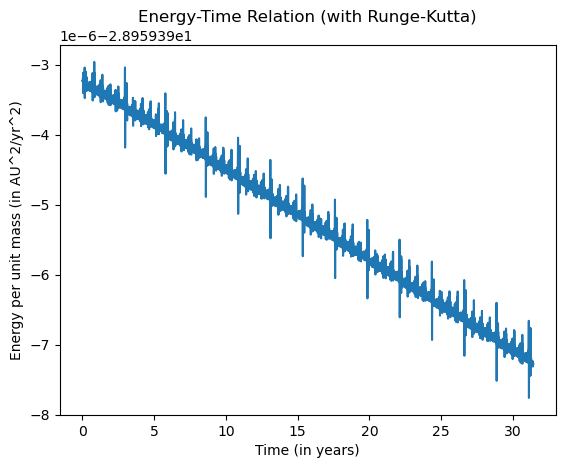

Mean energy per unit mass: -28.959395221945776 AU^2/yr^2
Max deviation: 4.798946811490623e-06 AU^2/yr^2


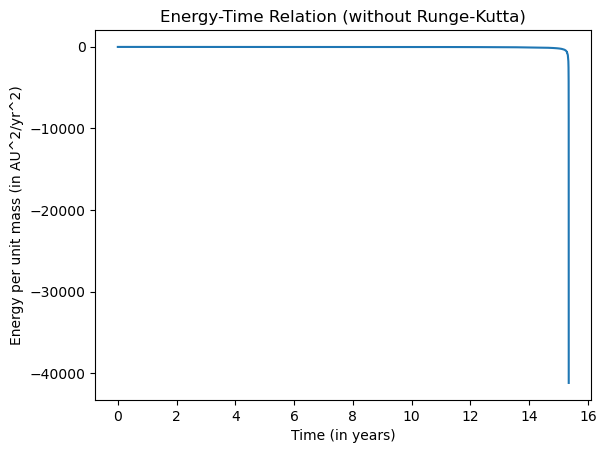

Mean energy per unit mass: -56.4897526332146 AU^2/yr^2
Max deviation: 41155.39484688366 AU^2/yr^2


In [104]:
e = 0.5*(vx**2 + vy**2) - 4*np.pi**2/r_mag
e2 = 0.5*(vx2**2 + vy2**2) - 4*np.pi**2/r_mag2

plt.plot(sol.t, e)
plt.title('Energy-Time Relation (with Runge-Kutta)')
plt.xlabel('Time (in years)')
plt.ylabel('Energy per unit mass (in AU^2/yr^2)')
plt.show()

print('Mean energy per unit mass:', np.mean(e), 'AU^2/yr^2')
print('Max deviation:', np.max(e) - np.min(e), 'AU^2/yr^2')

plt.plot(sol2.t, e2)
plt.title('Energy-Time Relation (without Runge-Kutta)')
plt.xlabel('Time (in years)')
plt.ylabel('Energy per unit mass (in AU^2/yr^2)')
plt.show()

print('Mean energy per unit mass:', np.mean(e2), 'AU^2/yr^2')
print('Max deviation:', np.max(e2) - np.min(e2), 'AU^2/yr^2')

As we can see, the maximum deviation for both the graphs is too high, especially the second graph, but the DOP853 method's accuracy helps to keep the first one much lower still. This is where Runge-Kutta method fails to keep the conservation stable.

One might ask why this method preserves the accuracy of the angular momentum so well but not that of the energy. The answer lies in the symmetries of both conservation laws. 

The angular momentum depends on the shape of the orbit and the symmetry of the force which is easier for the Runge-Kutta methods to respect as the positions and velocities update accordingly. Hence, the angular momentum stays conserved over long periods.

The energy depends on both the position and velocity very delicately. Even small rounding errors might be causing the Runge-Kutta method to break symmetry because the errors don't perfectly cancel. This causes the energy to drift over a long period and, hence, energy conservation is not protected.